**Multiclass Classification Convolutional Neural Network**

**Mount the google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import necessary libraries**

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Define data parameters**

In [3]:
train_data_dir = '/content/drive/MyDrive/Dr.Vadivu_Mam/Assignment_DL/train'
test_data_dir = '/content/drive/MyDrive/Dr.Vadivu_Mam/Assignment_DL/test'
input_shape = (224, 224, 3)  # Adjust based on your data

**Check the version of tensorflow**

In [4]:
tf.__version__

'2.14.0'

## Part 1 - Data Preprocessing

**Data augmentation and preprocessing**

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,       # Rescale pixel values to [0, 1]
    rotation_range=20,      # Augmentation parameters (optional)
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=16,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_shape[:2],
    batch_size=16,
    class_mode='categorical'
)

Found 15 images belonging to 5 classes.
Found 5 images belonging to 5 classes.


**Build deep learning model**

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(100, activation='relu'))

model.add(Dense(5, activation='softmax'))  # num_classes is the number of classes in your dataset


**Compile the model**

In [7]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**Train the Model**

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,  # Adjust the number of epochs
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/25
1/1 [==============================] - 5s 5s/step - loss: 1.6070 - accuracy: 0.2667 - val_loss: 2.8804 - val_accuracy: 0.2000
Epoch 2/25
1/1 [==============================] - 1s 707ms/step - loss: 2.8952 - accuracy: 0.2000 - val_loss: 1.7743 - val_accuracy: 0.2000
Epoch 3/25
1/1 [==============================] - 1s 764ms/step - loss: 1.7711 - accuracy: 0.2000 - val_loss: 1.6345 - val_accuracy: 0.2000
Epoch 4/25
1/1 [==============================] - 1s 549ms/step - loss: 1.6297 - accuracy: 0.2000 - val_loss: 1.6132 - val_accuracy: 0.2000
Epoch 5/25
1/1 [==============================] - 0s 487ms/step - loss: 1.6068 - accuracy: 0.2000 - val_loss: 1.5993 - val_accuracy: 0.4000
Epoch 6/25
1/1 [==============================] - 0s 485ms/step - loss: 1.5915 - accuracy: 0.4000 - val_loss: 1.5669 - val_accuracy: 0.2000
Epoch 7/25
1/1 [==============================] - 0s 481ms/step - loss: 1.5701 - accuracy: 0.2000 - val_loss: 1.5553 - val_accuracy: 0.4000
Epoch 8/25
1/1 [=======

**Evaluate the model**

In [9]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 [==============================] - 0s 115ms/step - loss: 0.4231 - accuracy: 1.0000
Test Accuracy: 100.00%


**Save the model**

In [10]:
model.save('custom_multiclass_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Make Predictions**

In [11]:
# Step 7: Make Predictions (optional)
predictions = model.predict(test_generator)

1/1 [==============================] - 0s 184ms/step


**load the saved model**

In [12]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.load_model('custom_multiclass_model.h5')

**Load and preprocess new image**

In [26]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the new image
image_path = '/content/drive/MyDrive/Dr.Vadivu_Mam/DL_Validation_Photos/S5.jpeg'
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

In [27]:
# Make predictions
predictions = model.predict(img)
class_labels = ['Abinaya', 'Anbumozhi', 'Kavipriya', 'Neenu', 'Sangeetha']  # Replace with your class labels
predicted_class_index = np.argmax(predictions)
predicted_class = class_labels[predicted_class_index]
confidence = predictions[0][predicted_class_index] * 100

1/1 [==============================] - 0s 31ms/step


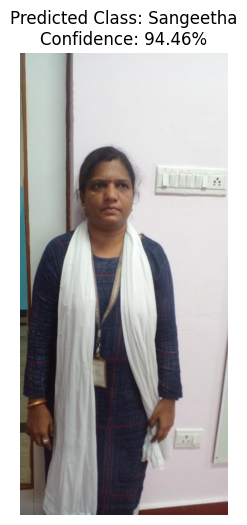

In [28]:
# Display the image with prediction
plt.figure(figsize=(6, 6))
plt.imshow(image.load_img(image_path))
plt.title(f'Predicted Class: {predicted_class}\nConfidence: {confidence:.2f}%')
plt.axis('off')
plt.show()